# Phase 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('train1.csv')
df.head()


,Unnamed: 0,review,label
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,2,If only to avoid making this type of film in t...,0
3,3,This film was probably inspired by Godard's Ma...,0
4,4,"Oh, brother...after hearing about this ridicul...",0


In [3]:
df1 = pd.read_csv('test1.csv')
df1.head()


,Unnamed: 0,review,label
0,0,I love sci-fi and am willing to put up with a ...,0
1,1,"Worth the entertainment value of a rental, esp...",0
2,2,its a totally average film with a few semi-alr...,0
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,4,"First off let me say, If you haven't enjoyed a...",0


In [4]:
data = df
data

,Unnamed: 0,review,label
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,2,If only to avoid making this type of film in t...,0
3,3,This film was probably inspired by Godard's Ma...,0
4,4,"Oh, brother...after hearing about this ridicul...",0
...,...,...,...
24995,24995,A hit at the time but now better categorised a...,1
24996,24996,I love this movie like no other. Another time ...,1
24997,24997,This film and it's sequel Barry Mckenzie holds...,1
24998,24998,'The Adventures Of Barry McKenzie' started lif...,1


In [5]:
data1 = df1
data1

,Unnamed: 0,review,label
0,0,I love sci-fi and am willing to put up with a ...,0
1,1,"Worth the entertainment value of a rental, esp...",0
2,2,its a totally average film with a few semi-alr...,0
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,4,"First off let me say, If you haven't enjoyed a...",0
...,...,...,...
24995,24995,Just got around to seeing Monster Man yesterda...,1
24996,24996,I got this as part of a competition prize. I w...,1
24997,24997,I got Monster Man in a box set of three films ...,1
24998,24998,"Five minutes in, i started to feel how naff th...",1


In [6]:
train = df.head()
train

,Unnamed: 0,review,label
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,2,If only to avoid making this type of film in t...,0
3,3,This film was probably inspired by Godard's Ma...,0
4,4,"Oh, brother...after hearing about this ridicul...",0


In [7]:
test = df1.head()
test

,Unnamed: 0,review,label
0,0,I love sci-fi and am willing to put up with a ...,0
1,1,"Worth the entertainment value of a rental, esp...",0
2,2,its a totally average film with a few semi-alr...,0
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,4,"First off let me say, If you haven't enjoyed a...",0


In [8]:
df.isnull().any() 

Unnamed: 0    False
review        False
label         False
dtype: bool

In [9]:
df1.isnull().any()

Unnamed: 0    False
review        False
label         False
dtype: bool

In [10]:
X = df.iloc[:, :1].values
X[:5]

y = df.iloc[:, -1].values
y[:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [11]:
X = df1.iloc[:, :1].values
X[:5]

y = df1.iloc[:, -1].values
y[:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['review_clean'] = data['review'].apply(lambda x: remove_punct(x))

data.head()


,Unnamed: 0,review,label,review_clean
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0,I rented I AM CURIOUSYELLOW from my video stor...
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0,I Am Curious Yellow is a risible and pretentio...
2,2,If only to avoid making this type of film in t...,0,If only to avoid making this type of film in t...
3,3,This film was probably inspired by Godard's Ma...,0,This film was probably inspired by Godards Mas...
4,4,"Oh, brother...after hearing about this ridicul...",0,Oh brotherafter hearing about this ridiculous ...


In [15]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data1['review_clean'] = data1['review'].apply(lambda x: remove_punct(x))

data1.head()

,Unnamed: 0,review,label,review_clean
0,0,I love sci-fi and am willing to put up with a ...,0,I love scifi and am willing to put up with a l...
1,1,"Worth the entertainment value of a rental, esp...",0,Worth the entertainment value of a rental espe...
2,2,its a totally average film with a few semi-alr...,0,its a totally average film with a few semialri...
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0,STAR RATING Saturday Night Friday Night Fri...
4,4,"First off let me say, If you haven't enjoyed a...",0,First off let me say If you havent enjoyed a V...


In [16]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['review_tokenized'] = data['review_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

data.head()

,Unnamed: 0,review,label,review_clean,review_tokenized
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0,I rented I AM CURIOUSYELLOW from my video stor...,"[i, rented, i, am, curiousyellow, from, my, vi..."
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0,I Am Curious Yellow is a risible and pretentio...,"[i, am, curious, yellow, is, a, risible, and, ..."
2,2,If only to avoid making this type of film in t...,0,If only to avoid making this type of film in t...,"[if, only, to, avoid, making, this, type, of, ..."
3,3,This film was probably inspired by Godard's Ma...,0,This film was probably inspired by Godards Mas...,"[this, film, was, probably, inspired, by, goda..."
4,4,"Oh, brother...after hearing about this ridicul...",0,Oh brotherafter hearing about this ridiculous ...,"[oh, brotherafter, hearing, about, this, ridic..."


In [17]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data1['review_tokenized'] = data1['review_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

data1.head()

,Unnamed: 0,review,label,review_clean,review_tokenized
0,0,I love sci-fi and am willing to put up with a ...,0,I love scifi and am willing to put up with a l...,"[i, love, scifi, and, am, willing, to, put, up..."
1,1,"Worth the entertainment value of a rental, esp...",0,Worth the entertainment value of a rental espe...,"[worth, the, entertainment, value, of, a, rent..."
2,2,its a totally average film with a few semi-alr...,0,its a totally average film with a few semialri...,"[its, a, totally, average, film, with, a, few,..."
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0,STAR RATING Saturday Night Friday Night Fri...,"[star, rating, saturday, night, friday, night,..."
4,4,"First off let me say, If you haven't enjoyed a...",0,First off let me say If you havent enjoyed a V...,"[first, off, let, me, say, if, you, havent, en..."


In [18]:
import nltk

stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [19]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data['review_nostop'] = data['review_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0,I rented I AM CURIOUSYELLOW from my video stor...,"[i, rented, i, am, curiousyellow, from, my, vi...","[rented, curiousyellow, video, store, controve..."
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0,I Am Curious Yellow is a risible and pretentio...,"[i, am, curious, yellow, is, a, risible, and, ...","[curious, yellow, risible, pretentious, steami..."
2,2,If only to avoid making this type of film in t...,0,If only to avoid making this type of film in t...,"[if, only, to, avoid, making, this, type, of, ...","[avoid, making, type, film, future, film, inte..."
3,3,This film was probably inspired by Godard's Ma...,0,This film was probably inspired by Godards Mas...,"[this, film, was, probably, inspired, by, goda...","[film, probably, inspired, godards, masculin, ..."
4,4,"Oh, brother...after hearing about this ridicul...",0,Oh brotherafter hearing about this ridiculous ...,"[oh, brotherafter, hearing, about, this, ridic...","[oh, brotherafter, hearing, ridiculous, film, ..."


In [20]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data1['review_nostop'] = data1['review_tokenized'].apply(lambda x: remove_stopwords(x))

data1.head()

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop
0,0,I love sci-fi and am willing to put up with a ...,0,I love scifi and am willing to put up with a l...,"[i, love, scifi, and, am, willing, to, put, up...","[love, scifi, willing, put, lot, scifi, movies..."
1,1,"Worth the entertainment value of a rental, esp...",0,Worth the entertainment value of a rental espe...,"[worth, the, entertainment, value, of, a, rent...","[worth, entertainment, value, rental, especial..."
2,2,its a totally average film with a few semi-alr...,0,its a totally average film with a few semialri...,"[its, a, totally, average, film, with, a, few,...","[totally, average, film, semialright, action, ..."
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0,STAR RATING Saturday Night Friday Night Fri...,"[star, rating, saturday, night, friday, night,...","[star, rating, saturday, night, friday, night,..."
4,4,"First off let me say, If you haven't enjoyed a...",0,First off let me say If you havent enjoyed a V...,"[first, off, let, me, say, if, you, havent, en...","[first, let, say, havent, enjoyed, van, damme,..."


In [21]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['review_stemmed'] = data['review_nostop'].apply(lambda x: stemming(x))

data.head()

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop,review_stemmed
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0,I rented I AM CURIOUSYELLOW from my video stor...,"[i, rented, i, am, curiousyellow, from, my, vi...","[rented, curiousyellow, video, store, controve...","[rent, curiousyellow, video, store, controvers..."
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0,I Am Curious Yellow is a risible and pretentio...,"[i, am, curious, yellow, is, a, risible, and, ...","[curious, yellow, risible, pretentious, steami...","[curiou, yellow, risibl, pretenti, steam, pile..."
2,2,If only to avoid making this type of film in t...,0,If only to avoid making this type of film in t...,"[if, only, to, avoid, making, this, type, of, ...","[avoid, making, type, film, future, film, inte...","[avoid, make, type, film, futur, film, interes..."
3,3,This film was probably inspired by Godard's Ma...,0,This film was probably inspired by Godards Mas...,"[this, film, was, probably, inspired, by, goda...","[film, probably, inspired, godards, masculin, ...","[film, probabl, inspir, godard, masculin, fémi..."
4,4,"Oh, brother...after hearing about this ridicul...",0,Oh brotherafter hearing about this ridiculous ...,"[oh, brotherafter, hearing, about, this, ridic...","[oh, brotherafter, hearing, ridiculous, film, ...","[oh, brotheraft, hear, ridicul, film, umpteen,..."


In [22]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data1['review_stemmed'] = data1['review_nostop'].apply(lambda x: stemming(x))

data1.head()

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop,review_stemmed
0,0,I love sci-fi and am willing to put up with a ...,0,I love scifi and am willing to put up with a l...,"[i, love, scifi, and, am, willing, to, put, up...","[love, scifi, willing, put, lot, scifi, movies...","[love, scifi, will, put, lot, scifi, moviestv,..."
1,1,"Worth the entertainment value of a rental, esp...",0,Worth the entertainment value of a rental espe...,"[worth, the, entertainment, value, of, a, rent...","[worth, entertainment, value, rental, especial...","[worth, entertain, valu, rental, especi, like,..."
2,2,its a totally average film with a few semi-alr...,0,its a totally average film with a few semialri...,"[its, a, totally, average, film, with, a, few,...","[totally, average, film, semialright, action, ...","[total, averag, film, semialright, action, seq..."
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0,STAR RATING Saturday Night Friday Night Fri...,"[star, rating, saturday, night, friday, night,...","[star, rating, saturday, night, friday, night,...","[star, rate, saturday, night, friday, night, f..."
4,4,"First off let me say, If you haven't enjoyed a...",0,First off let me say If you havent enjoyed a V...,"[first, off, let, me, say, if, you, havent, en...","[first, let, say, havent, enjoyed, van, damme,...","[first, let, say, havent, enjoy, van, damm, mo..."


In [23]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['review_lemmatized'] = data['review_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop,review_stemmed,review_lemmatized
0,0,I rented I AM CURIOUS-YELLOW from my video sto...,0,I rented I AM CURIOUSYELLOW from my video stor...,"[i, rented, i, am, curiousyellow, from, my, vi...","[rented, curiousyellow, video, store, controve...","[rent, curiousyellow, video, store, controvers...","[rented, curiousyellow, video, store, controve..."
1,1,"""I Am Curious: Yellow"" is a risible and preten...",0,I Am Curious Yellow is a risible and pretentio...,"[i, am, curious, yellow, is, a, risible, and, ...","[curious, yellow, risible, pretentious, steami...","[curiou, yellow, risibl, pretenti, steam, pile...","[curious, yellow, risible, pretentious, steami..."
2,2,If only to avoid making this type of film in t...,0,If only to avoid making this type of film in t...,"[if, only, to, avoid, making, this, type, of, ...","[avoid, making, type, film, future, film, inte...","[avoid, make, type, film, futur, film, interes...","[avoid, making, type, film, future, film, inte..."
3,3,This film was probably inspired by Godard's Ma...,0,This film was probably inspired by Godards Mas...,"[this, film, was, probably, inspired, by, goda...","[film, probably, inspired, godards, masculin, ...","[film, probabl, inspir, godard, masculin, fémi...","[film, probably, inspired, godard, masculin, f..."
4,4,"Oh, brother...after hearing about this ridicul...",0,Oh brotherafter hearing about this ridiculous ...,"[oh, brotherafter, hearing, about, this, ridic...","[oh, brotherafter, hearing, ridiculous, film, ...","[oh, brotheraft, hear, ridicul, film, umpteen,...","[oh, brotherafter, hearing, ridiculous, film, ..."
5,5,I would put this at the top of my list of film...,0,I would put this at the top of my list of film...,"[i, would, put, this, at, the, top, of, my, li...","[would, put, top, list, films, category, unwat...","[would, put, top, list, film, categori, unwatc...","[would, put, top, list, film, category, unwatc..."
6,6,Whoever wrote the screenplay for this movie ob...,0,Whoever wrote the screenplay for this movie ob...,"[whoever, wrote, the, screenplay, for, this, m...","[whoever, wrote, screenplay, movie, obviously,...","[whoever, wrote, screenplay, movi, obvious, ne...","[whoever, wrote, screenplay, movie, obviously,..."
7,7,"When I first saw a glimpse of this movie, I qu...",0,When I first saw a glimpse of this movie I qui...,"[when, i, first, saw, a, glimpse, of, this, mo...","[first, saw, glimpse, movie, quickly, noticed,...","[first, saw, glimps, movi, quickli, notic, act...","[first, saw, glimpse, movie, quickly, noticed,..."
8,8,"Who are these ""They""- the actors? the filmmake...",0,Who are these They the actors the filmmakers C...,"[who, are, these, they, the, actors, the, film...","[actors, filmmakers, certainly, couldnt, audie...","[actor, filmmak, certainli, couldnt, audienc, ...","[actor, filmmaker, certainly, couldnt, audienc..."
9,9,This is said to be a personal film for Peter B...,0,This is said to be a personal film for Peter B...,"[this, is, said, to, be, a, personal, film, fo...","[said, personal, film, peter, bogdonavitch, ba...","[said, person, film, peter, bogdonavitch, base...","[said, personal, film, peter, bogdonavitch, ba..."


In [24]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data1['review_lemmatized'] = data1['review_nostop'].apply(lambda x: lemmatizing(x))

data1.head(10)

,Unnamed: 0,review,label,review_clean,review_tokenized,review_nostop,review_stemmed,review_lemmatized
0,0,I love sci-fi and am willing to put up with a ...,0,I love scifi and am willing to put up with a l...,"[i, love, scifi, and, am, willing, to, put, up...","[love, scifi, willing, put, lot, scifi, movies...","[love, scifi, will, put, lot, scifi, moviestv,...","[love, scifi, willing, put, lot, scifi, movies..."
1,1,"Worth the entertainment value of a rental, esp...",0,Worth the entertainment value of a rental espe...,"[worth, the, entertainment, value, of, a, rent...","[worth, entertainment, value, rental, especial...","[worth, entertain, valu, rental, especi, like,...","[worth, entertainment, value, rental, especial..."
2,2,its a totally average film with a few semi-alr...,0,its a totally average film with a few semialri...,"[its, a, totally, average, film, with, a, few,...","[totally, average, film, semialright, action, ...","[total, averag, film, semialright, action, seq...","[totally, average, film, semialright, action, ..."
3,3,STAR RATING: ***** Saturday Night **** Friday ...,0,STAR RATING Saturday Night Friday Night Fri...,"[star, rating, saturday, night, friday, night,...","[star, rating, saturday, night, friday, night,...","[star, rate, saturday, night, friday, night, f...","[star, rating, saturday, night, friday, night,..."
4,4,"First off let me say, If you haven't enjoyed a...",0,First off let me say If you havent enjoyed a V...,"[first, off, let, me, say, if, you, havent, en...","[first, let, say, havent, enjoyed, van, damme,...","[first, let, say, havent, enjoy, van, damm, mo...","[first, let, say, havent, enjoyed, van, damme,..."
5,5,I had high hopes for this one until they chang...,0,I had high hopes for this one until they chang...,"[i, had, high, hopes, for, this, one, until, t...","[high, hopes, one, changed, name, shepherd, bo...","[high, hope, one, chang, name, shepherd, borde...","[high, hope, one, changed, name, shepherd, bor..."
6,6,Isaac Florentine has made some of the best wes...,0,Isaac Florentine has made some of the best wes...,"[isaac, florentine, has, made, some, of, the, ...","[isaac, florentine, made, best, western, marti...","[isaac, florentin, made, best, western, martia...","[isaac, florentine, made, best, western, marti..."
7,7,"It actually pains me to say it, but this movie...",0,It actually pains me to say it but this movie ...,"[it, actually, pains, me, to, say, it, but, th...","[actually, pains, say, movie, horrible, every,...","[actual, pain, say, movi, horribl, everi, leve...","[actually, pain, say, movie, horrible, every, ..."
8,8,"Technically I'am a Van Damme Fan, or I was. th...",0,Technically Iam a Van Damme Fan or I was this ...,"[technically, iam, a, van, damme, fan, or, i, ...","[technically, iam, van, damme, fan, movie, bad...","[technic, iam, van, damm, fan, movi, bad, hate...","[technically, iam, van, damme, fan, movie, bad..."
9,9,"Honestly awful film, bad editing, awful lighti...",0,Honestly awful film bad editing awful lighting...,"[honestly, awful, film, bad, editing, awful, l...","[honestly, awful, film, bad, editing, awful, l...","[honestli, aw, film, bad, edit, aw, light, dir...","[honestly, awful, film, bad, editing, awful, l..."


In [25]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(train['review'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5, 407)
['', '1', '1967', '2', '210', '40', 'abil', 'account', 'act', 'actorsbr', 'actress', 'admittedli', 'ago', 'alleg', 'also', 'although', 'america', 'american', 'anatom', 'annoy', 'anonym', 'answer', 'anyon', 'anyth', 'apart', 'appear', 'arguabl', 'around', 'artifactwhatev', 'artist', 'ash', 'asini', 'ask', 'attent', 'automat', 'averag', 'avoid', 'away', 'beckon', 'bergman', 'better', 'black', 'bland', 'blank', 'blaxploit', 'bodi', 'bore', 'boxbr', 'boy', 'br', 'breez', 'brotheraft', 'brown', 'bunni', 'burn', 'cabl', 'cannot', 'case', 'censorship', 'center', 'certain', 'cheapli', 'chloe', 'cinema', 'claim', 'classmat', 'clitori', 'closeup', 'cogent', 'columbu', 'come', 'commend', 'compar', 'condemn', 'consid', 'controversi', 'could', 'countri', 'countrymen', 'crappi', 'cri', 'cultur', 'curiou', 'curiousyellow', 'custom', 'dead', 'denizen', 'depress', 'differ', 'dirti', 'discern', 'display', 'documentari', 'doesnt', 'dont', 'doubl', 'doublestandard', 'drama', 'earli', 'element', '

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['review'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(25000, 92247)
['', '0', '00', '000', '0000000000001', '000001', '00000110', '0001', '00015', '001', '0010', '002', '00383042', '006', '007', '0079', '0080', '0083', '01', '010', '01000', '010br', '010make', '0110', '012310', '0130', '013007', '02', '029', '02br', '03', '0310', '03oct2009', '04', '041', '048', '05', '050', '0510', '053105', '06', '06th', '07', '079', '07kiloton', '08', '081006', '087', '089', '08th', '09', '09082009', '091505', '09br', '0br', '0f', '0ne', '0r', '0s', '0star', '0when', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '1000000000000', '1000000000000010000000000000', '10002000', '1000lb', '1001', '100200', '100am', '100b', '100br', '100hell', '100kin', '100m', '100min', '100minut', '100mph', '100percent', '100plu', '100squar', '100th', '100thgrade', '100x', '100yard', '100year', '100yearold', '101', '1010', '1010br', '1010seek', '1011', '1012', '1013', '1014', '101499', '1015', '101503', '101575', '101706', '101br', '101minut', '101st',

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data1['review'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(25000, 90447)
['', '0', '00', '000', '00000001', '001', '002', '0069', '007', '0079', '007br', '0083', '009', '00agent', '00schneider', '01', '010', '010606', '010707', '010br', '0126', '02', '0205', '0210', '0230', '030', '03092005', '039', '04', '04082007', '044', '05', '0510', '05br', '06', '060241', '0615', '06and', '06br', '07', '075', '08', '0815', '08th', '09', '0and', '0br', '0clock', '0f', '0s', '0ttbr', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000', '10000000000', '1000000000000010', '100000dm', '100001', '10005000', '1000month', '1000pm', '1000th', '1000word', '1000wordstori', '1001', '100100', '100200', '100219', '1004', '100603', '100br', '100bt', '100ft', '100ib', '100if', '100k', '100mile', '100millionplu', '100min', '100minut', '100minutelong', '100oo', '100th', '100time', '100x', '100year', '100yearold', '101', '1010', '10102009', '1010br', '1010i', '1010neg', '1011', '1012', '1013', '1015', '101br', '101minut', '101st',

In [36]:
X_counts

<25000x90447 sparse matrix of type '<class 'numpy.int64'>'
	with 2398206 stored elements in Compressed Sparse Row format>

In [37]:
import pandas as pd
train_df_pos= pd.DataFrame(data, columns=['review'])
train_df_pos['label']='pos'
train_df_pos.head()

,review,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,pos
1,"""I Am Curious: Yellow"" is a risible and preten...",pos
2,If only to avoid making this type of film in t...,pos
3,This film was probably inspired by Godard's Ma...,pos
4,"Oh, brother...after hearing about this ridicul...",pos


In [38]:
import pandas as pd
train_df_neg= pd.DataFrame(data, columns=['review'])
train_df_neg['label']='neg'
train_df_neg.head()

,review,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,neg
1,"""I Am Curious: Yellow"" is a risible and preten...",neg
2,If only to avoid making this type of film in t...,neg
3,This film was probably inspired by Godard's Ma...,neg
4,"Oh, brother...after hearing about this ridicul...",neg


In [40]:
test_df_neg= pd.DataFrame(data1, columns=['review'])
test_df_neg['label']='neg'
test_df_neg.head()


,review,label
0,I love sci-fi and am willing to put up with a ...,neg
1,"Worth the entertainment value of a rental, esp...",neg
2,its a totally average film with a few semi-alr...,neg
3,STAR RATING: ***** Saturday Night **** Friday ...,neg
4,"First off let me say, If you haven't enjoyed a...",neg


In [41]:
test_df_pos= pd.DataFrame(data1, columns=['review'])
test_df_pos['label']='pos'
test_df_pos.head()

,review,label
0,I love sci-fi and am willing to put up with a ...,pos
1,"Worth the entertainment value of a rental, esp...",pos
2,its a totally average film with a few semi-alr...,pos
3,STAR RATING: ***** Saturday Night **** Friday ...,pos
4,"First off let me say, If you haven't enjoyed a...",pos


# Phase 2 and Phase 3

In [42]:
import pandas as pd
import os
from nltk.corpus import stopwords
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering

In [43]:
#remove html and br tags from training and testing data
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(df):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in df]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in df]
    
    return df

In [45]:
def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [46]:
def print_feature(df):
    
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(100), importances[indices[:100]],
           color="g", align="center")
    plt.xticks(range(100), sorted_features[:100], rotation=90)
    plt.xlim([-1, 100])
    plt.show()

    return()

In [47]:
def get_bestrf(X, y):
    parameters = [
        {
            "n_estimators":[5, 10, 20, 50, 100],
            "criterion":['gini', 'entropy']
        }
    ]

    best_clf = GridSearchCV(clf, parameters, scoring="accuracy", verbose=5, n_jobs=4)

    best_clf.fit(X, y)
    
    return(best_clf.best_estimator_.n_estimators, best_clf.best_estimator_.criterion)

Feature ranking:
feature 72229 : waste (0.005409)
feature 73700 : worst (0.005299)
feature 5502 : bad (0.004867)
feature 28545 : great (0.004715)
feature 5266 : awful (0.003353)
feature 22912 : excellent (0.002884)
feature 66150 : terrible (0.002532)
feature 73683 : worse (0.002441)
feature 45805 : no (0.002440)
feature 8512 : boring (0.002370)
feature 63831 : stupid (0.002365)
feature 46074 : nothing (0.002146)
feature 73496 : wonderful (0.002107)
feature 7045 : best (0.001942)
feature 3258 : and (0.001877)
feature 50818 : poor (0.001849)
feature 50821 : poorly (0.001833)
feature 49221 : perfect (0.001730)
feature 55773 : ridiculous (0.001698)
feature 5208 : avoid (0.001689)


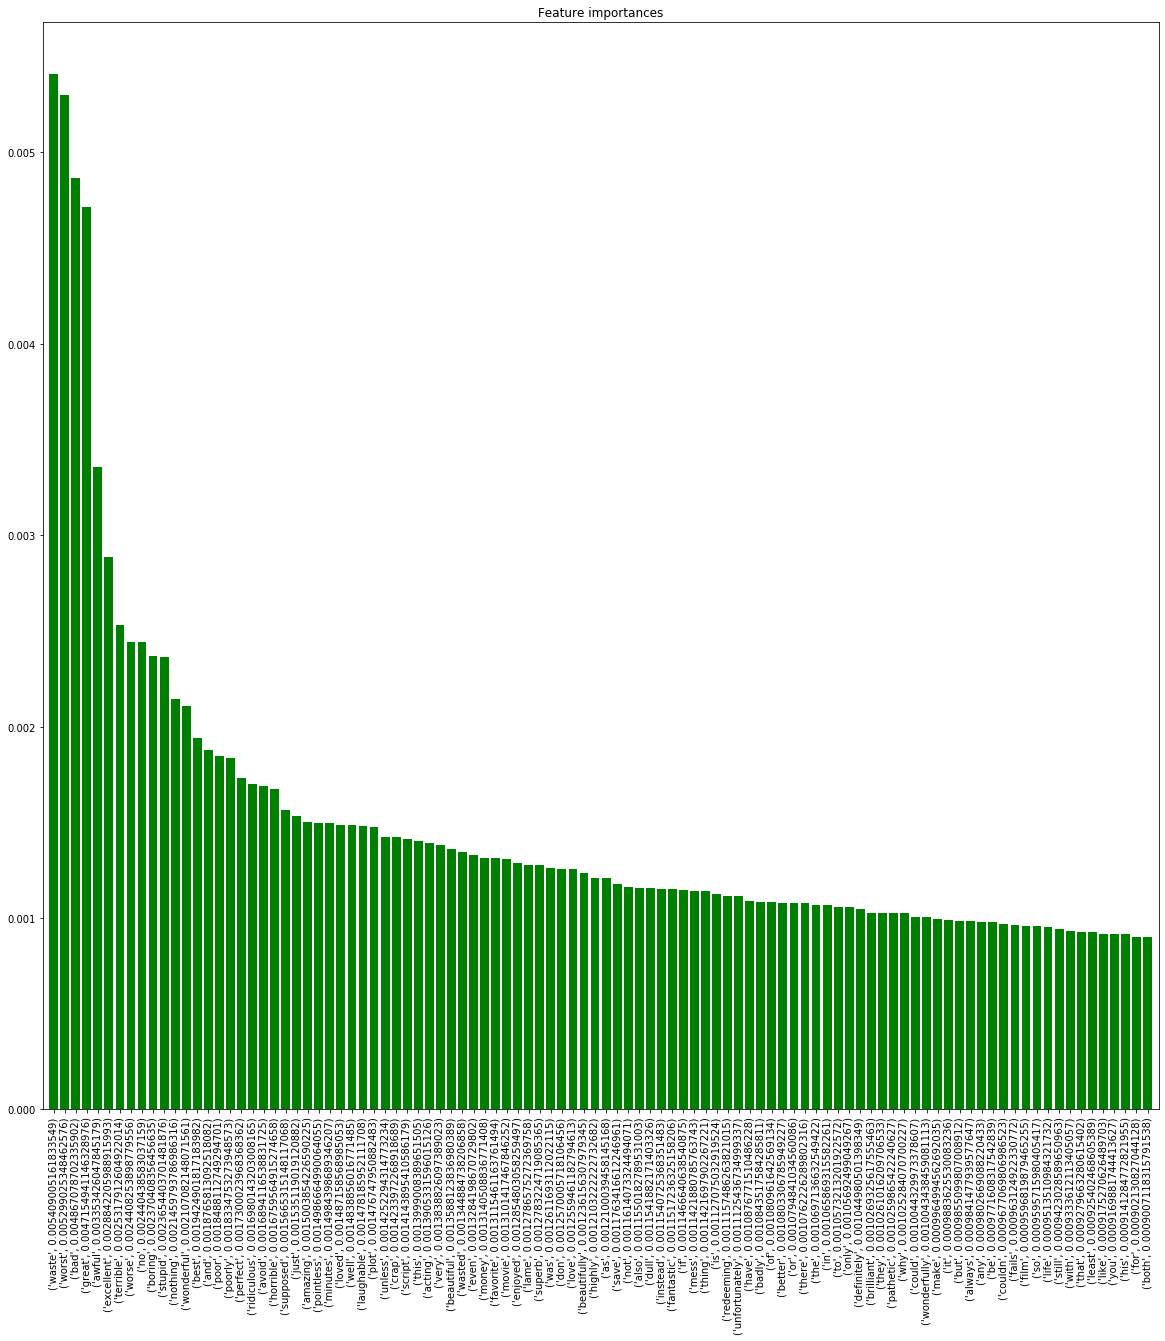

()

In [49]:
print_feature(df)

Feature ranking:
feature 72722 : worst (0.006426)
feature 5377 : bad (0.005199)
feature 71215 : waste (0.004691)
feature 28360 : great (0.004336)
feature 22721 : excellent (0.003835)
feature 8330 : boring (0.002567)
feature 5141 : awful (0.002505)
feature 65222 : terrible (0.002457)
feature 6910 : best (0.002143)
feature 50191 : poor (0.002050)
feature 31388 : horrible (0.002016)
feature 72705 : worse (0.002009)
feature 72528 : wonderful (0.001990)
feature 63611 : supposed (0.001959)
feature 62945 : stupid (0.001883)
feature 15217 : crap (0.001838)
feature 5081 : avoid (0.001740)
feature 45422 : nothing (0.001714)
feature 3199 : and (0.001710)
feature 22536 : even (0.001691)


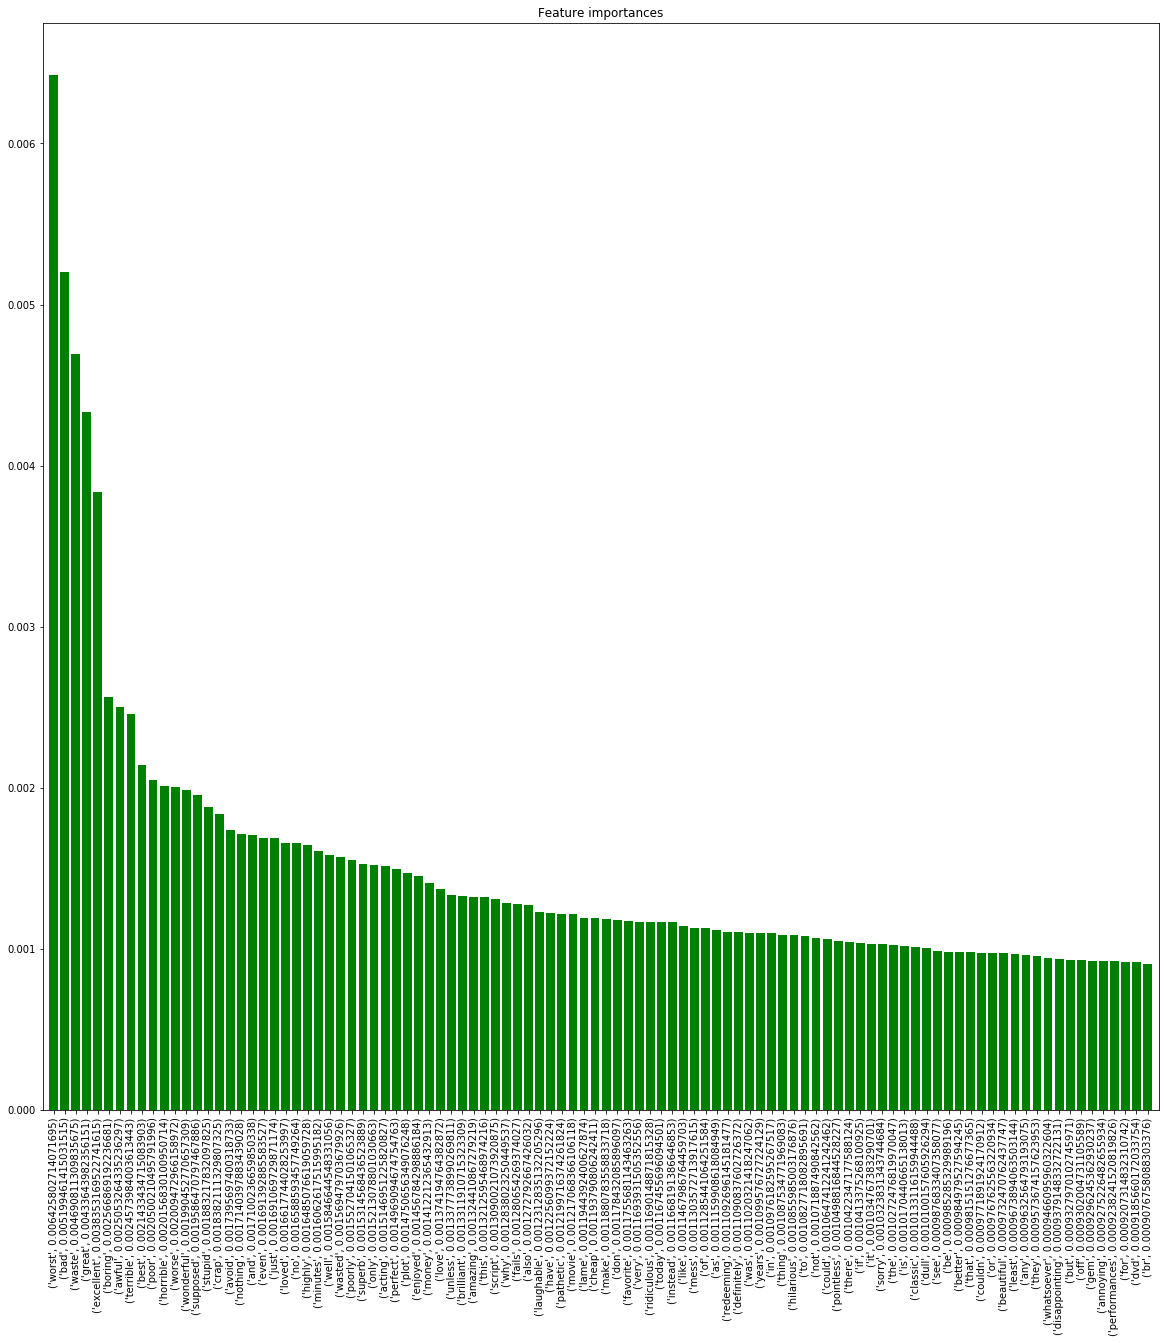

()

In [50]:
print_feature(df1)

Feature ranking:
feature 5502 : bad (0.005088)
feature 73700 : worst (0.005053)
feature 72229 : waste (0.004825)
feature 28545 : great (0.004038)
feature 5266 : awful (0.003524)
feature 22912 : excellent (0.003431)
feature 66150 : terrible (0.002741)
feature 8512 : boring (0.002612)
feature 73496 : wonderful (0.002552)
feature 73683 : worse (0.002342)
feature 45805 : no (0.002162)
feature 31669 : horrible (0.001911)
feature 15340 : crap (0.001894)
feature 63831 : stupid (0.001867)
feature 46074 : nothing (0.001852)
feature 7045 : best (0.001824)
feature 50818 : poor (0.001763)
feature 50428 : plot (0.001703)
feature 72557 : well (0.001642)
feature 49221 : perfect (0.001613)


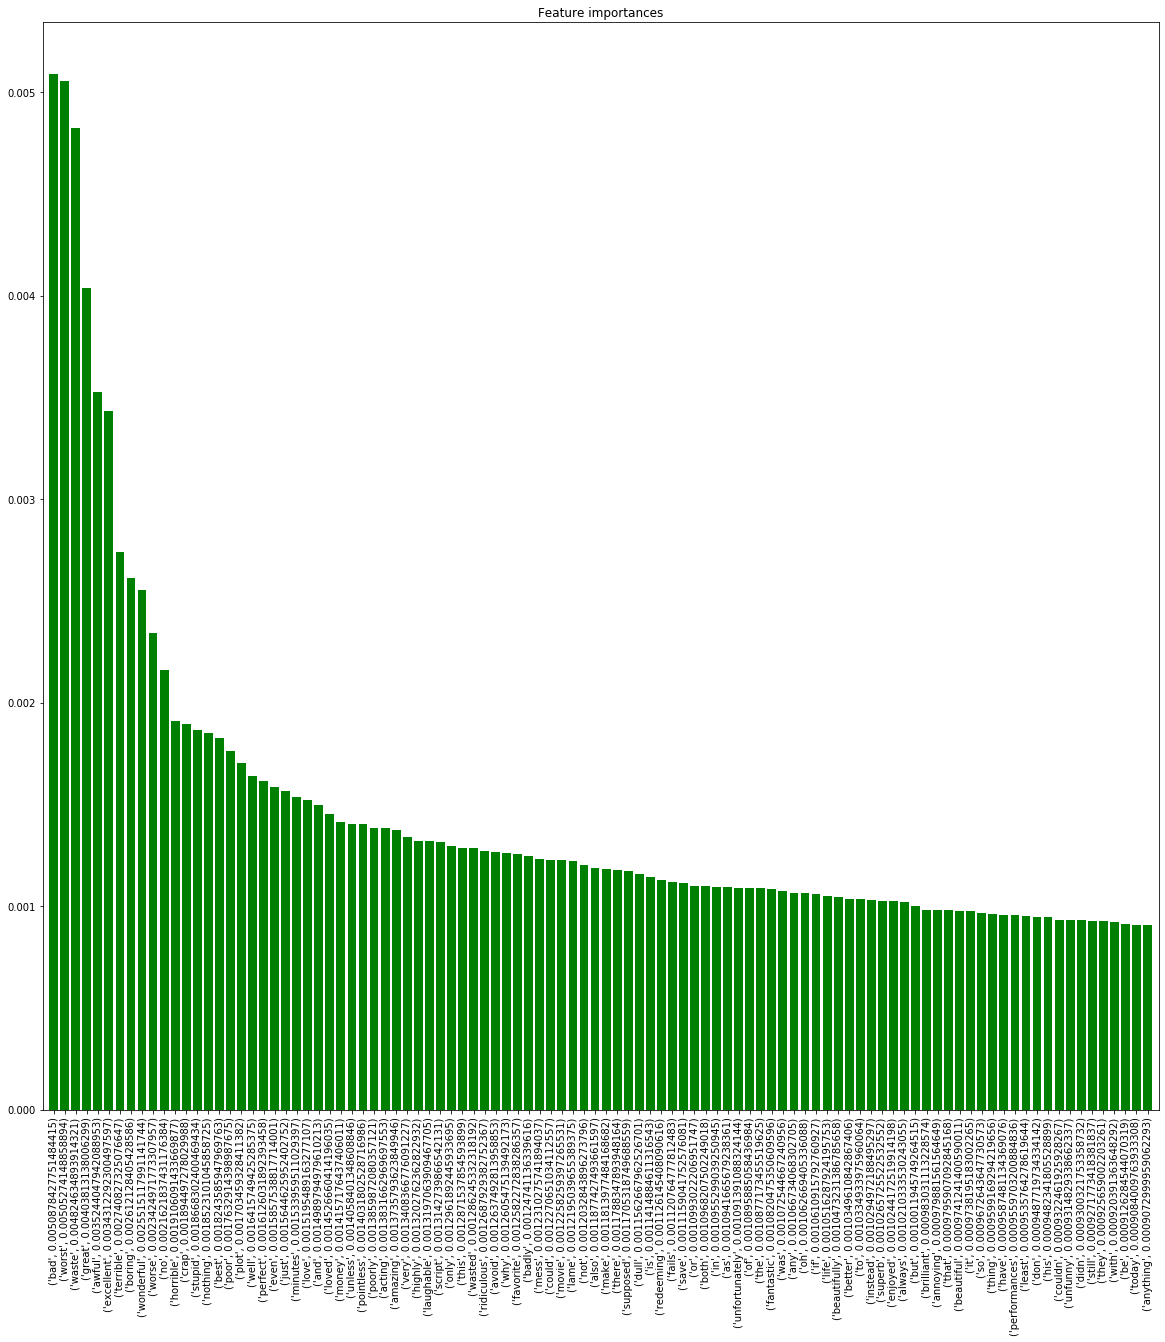

()

In [51]:
print_feature(data)

In [52]:
!pip install wordcloud

In [53]:
train_pos = train_df_pos.head()
train_pos

,review,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,pos
1,"""I Am Curious: Yellow"" is a risible and preten...",pos
2,If only to avoid making this type of film in t...,pos
3,This film was probably inspired by Godard's Ma...,pos
4,"Oh, brother...after hearing about this ridicul...",pos


In [54]:
train_neg = train_df_neg.head()
train_neg

,review,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,neg
1,"""I Am Curious: Yellow"" is a risible and preten...",neg
2,If only to avoid making this type of film in t...,neg
3,This film was probably inspired by Godard's Ma...,neg
4,"Oh, brother...after hearing about this ridicul...",neg


In [55]:
df_freq = pd.concat([train_pos, train_neg], ignore_index = True)
df_freq

,review,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,pos
1,"""I Am Curious: Yellow"" is a risible and preten...",pos
2,If only to avoid making this type of film in t...,pos
3,This film was probably inspired by Godard's Ma...,pos
4,"Oh, brother...after hearing about this ridicul...",pos
5,I rented I AM CURIOUS-YELLOW from my video sto...,neg
6,"""I Am Curious: Yellow"" is a risible and preten...",neg
7,If only to avoid making this type of film in t...,neg
8,This film was probably inspired by Godard's Ma...,neg
9,"Oh, brother...after hearing about this ridicul...",neg


In [56]:
test_neg = test_df_neg.head()
test_neg

,review,label
0,I love sci-fi and am willing to put up with a ...,neg
1,"Worth the entertainment value of a rental, esp...",neg
2,its a totally average film with a few semi-alr...,neg
3,STAR RATING: ***** Saturday Night **** Friday ...,neg
4,"First off let me say, If you haven't enjoyed a...",neg


In [57]:
test_pos = test_df_pos.head()
test_pos

,review,label
0,I love sci-fi and am willing to put up with a ...,pos
1,"Worth the entertainment value of a rental, esp...",pos
2,its a totally average film with a few semi-alr...,pos
3,STAR RATING: ***** Saturday Night **** Friday ...,pos
4,"First off let me say, If you haven't enjoyed a...",pos


In [59]:
df_freq1 = pd.concat([test_pos, test_neg], ignore_index = True)
df_freq1

,review,label
0,I love sci-fi and am willing to put up with a ...,pos
1,"Worth the entertainment value of a rental, esp...",pos
2,its a totally average film with a few semi-alr...,pos
3,STAR RATING: ***** Saturday Night **** Friday ...,pos
4,"First off let me say, If you haven't enjoyed a...",pos
5,I love sci-fi and am willing to put up with a ...,neg
6,"Worth the entertainment value of a rental, esp...",neg
7,its a totally average film with a few semi-alr...,neg
8,STAR RATING: ***** Saturday Night **** Friday ...,neg
9,"First off let me say, If you haven't enjoyed a...",neg


In [60]:
freq = pd.concat([test_pos, train_pos], ignore_index = True)
freq

,review,label
0,I love sci-fi and am willing to put up with a ...,pos
1,"Worth the entertainment value of a rental, esp...",pos
2,its a totally average film with a few semi-alr...,pos
3,STAR RATING: ***** Saturday Night **** Friday ...,pos
4,"First off let me say, If you haven't enjoyed a...",pos
5,I rented I AM CURIOUS-YELLOW from my video sto...,pos
6,"""I Am Curious: Yellow"" is a risible and preten...",pos
7,If only to avoid making this type of film in t...,pos
8,This film was probably inspired by Godard's Ma...,pos
9,"Oh, brother...after hearing about this ridicul...",pos


In [61]:
freq1 = pd.concat([test_neg, train_neg], ignore_index = True)
freq1

,review,label
0,I love sci-fi and am willing to put up with a ...,neg
1,"Worth the entertainment value of a rental, esp...",neg
2,its a totally average film with a few semi-alr...,neg
3,STAR RATING: ***** Saturday Night **** Friday ...,neg
4,"First off let me say, If you haven't enjoyed a...",neg
5,I rented I AM CURIOUS-YELLOW from my video sto...,neg
6,"""I Am Curious: Yellow"" is a risible and preten...",neg
7,If only to avoid making this type of film in t...,neg
8,This film was probably inspired by Godard's Ma...,neg
9,"Oh, brother...after hearing about this ridicul...",neg


In [63]:
###################################### Negative set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([test_neg, train_neg], ignore_index = True)

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
br,46
film,28
good,11
films,10
really,10
van,9
like,8
movie,8
sex,8
damme,7


In [64]:
###################################### Negative set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([train_neg, test_neg], ignore_index = True)

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
br,46
film,28
good,11
films,10
really,10
van,9
like,8
movie,8
sex,8
damme,7


In [67]:
######################### Lowest and highest frequency words ###########################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([test_neg, train_neg], ignore_index = True)

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

    frequency
br         46
    frequency
10          1


In [68]:
######################### Lowest and highest frequency words ###########################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([train_pos, test_pos], ignore_index = True)

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

    frequency
br         46
    frequency
10          1


In [69]:
from wordcloud import WordCloud

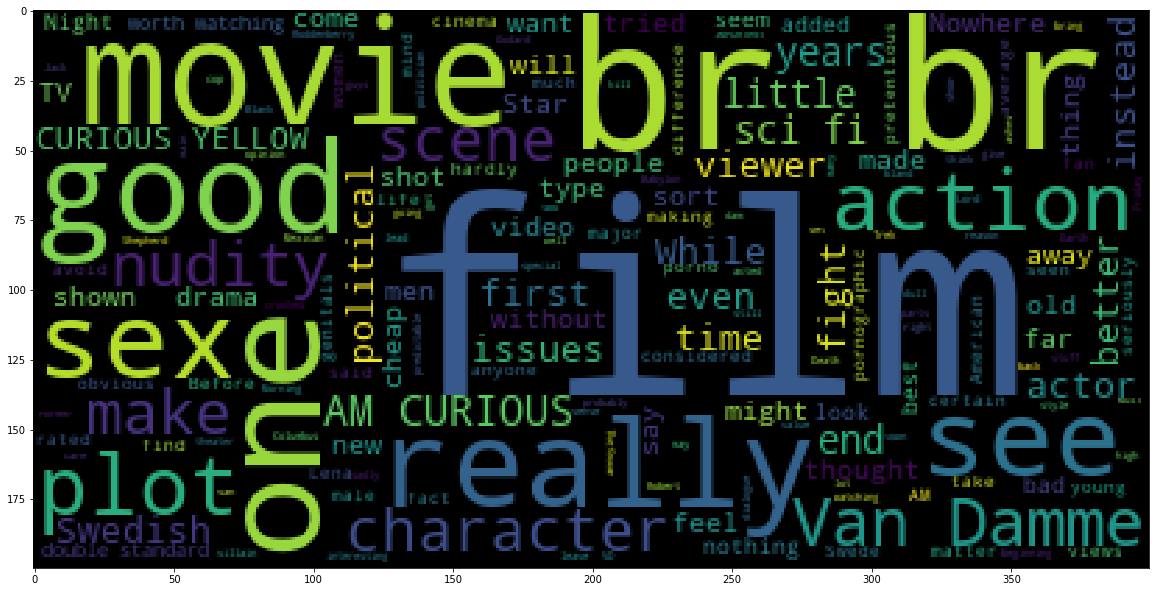

In [71]:
########################## WordCloud Positive Train & Test set ##################################

# Creating a list of train and test data to analyse
df_freq = pd.concat([train_pos, test_pos], ignore_index= True)
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

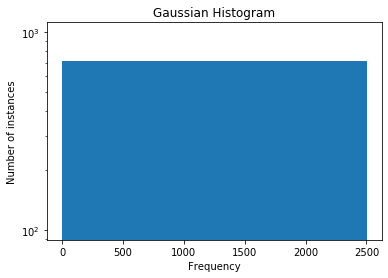

In [72]:
########################## Histogram Positive Train & Test set ##################################

#Combining cleaned train and test data
df_freq = pd.concat([train_pos, test_pos], ignore_index = True)

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

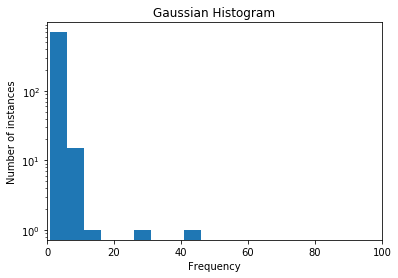

In [73]:

zoom_data = [f for f in data[0] if f <= 100]
binwidth = 5
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.xlim(0, 100)
plt.show()

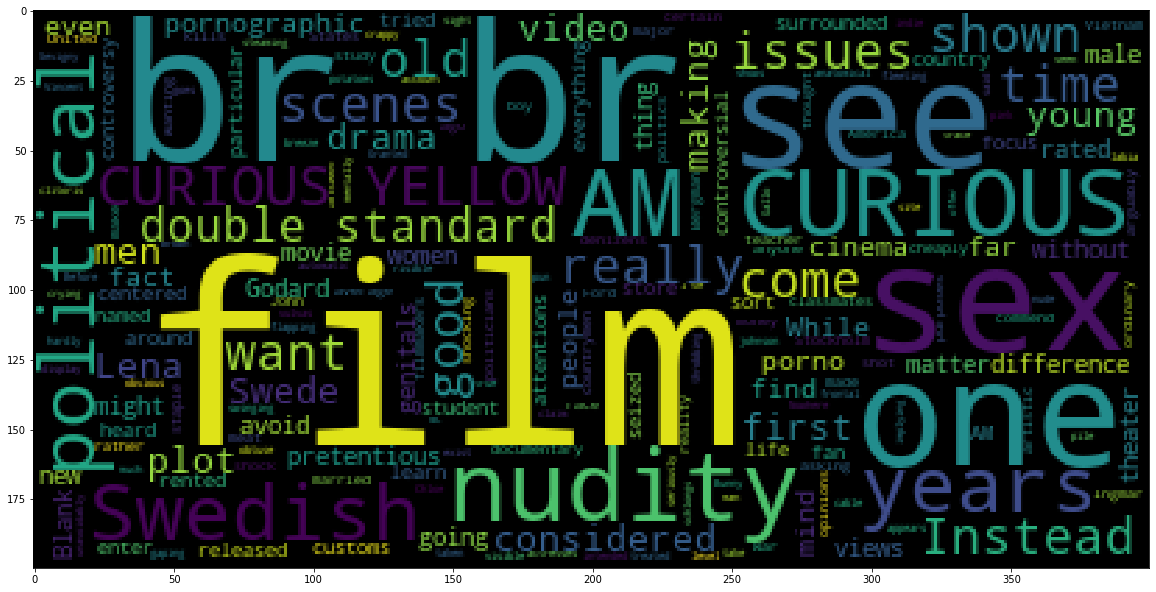

In [76]:
########################## WordCloud Positive Train & Test set post feature selection ##################################

# Creating a list of train and test data to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

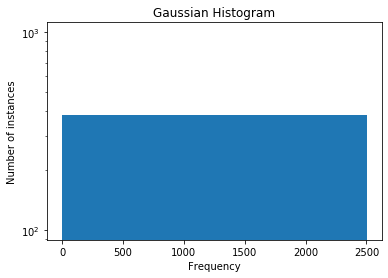

In [77]:
########################## Histogram Positive Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

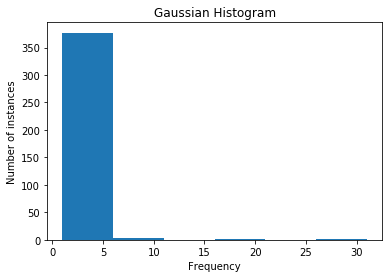

In [78]:

zoom_data = [f for f in data[0] if f <= 100]
binwidth = 5
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


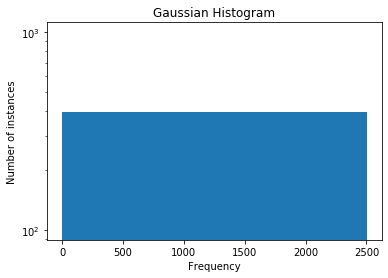

In [79]:
########################## Histogram Negative Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

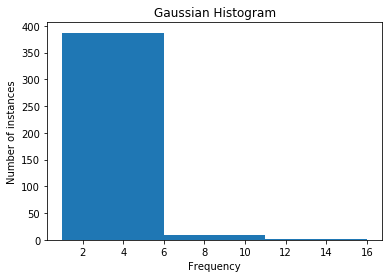

In [80]:

zoom_data = [f for f in data[0] if f <= 100]
binwidth = 5
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


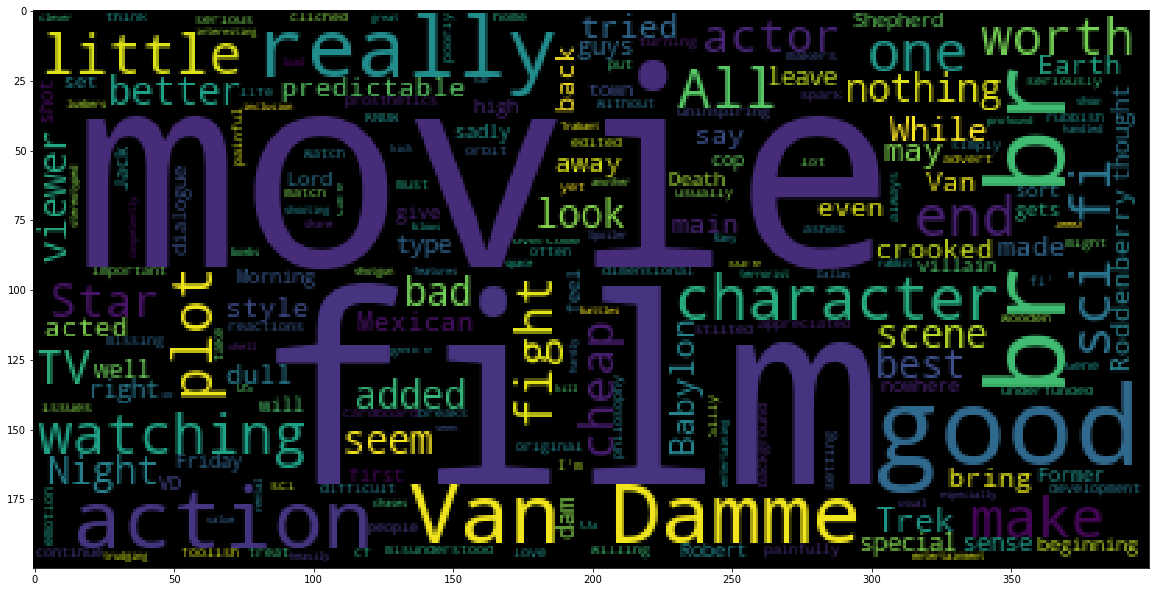

In [81]:
########################## WordCloud Negative Train & Test set post feature selection ##################################

# Creating a list of data only to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['neg'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud 
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

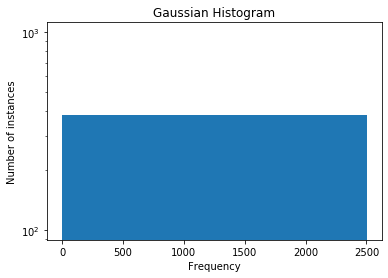

In [82]:
########################## Histogram Positive Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

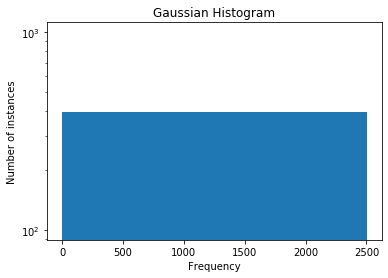

In [83]:
########################## Histogram Negative Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

# Phase 4 and Phase 5

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['label'], test_size=0.25, random_state=0)
print("X_train: ",len(X_train))
print("X_test: " , len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

X_train:  18750
X_test:  6250
y_train: 18750
y_test: 6250


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = None)
cv.fit(X_train)

CountVectorizer()

In [93]:
X_train_cv = cv.transform(X_train)

In [94]:
X_test_cv = cv.transform(X_test)

In [95]:
# naive_bayes
from sklearn.naive_bayes import MultinomialNB

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['label'], test_size=0.25, random_state=0)

In [107]:
X_train.shape

(18750,)

In [108]:
X_test.shape

(6250,)

In [109]:
# fit the classifier model
clf = MultinomialNB()

In [111]:
clf.fit(X_train_cv, y_train)

MultinomialNB()

In [112]:
# predict the outcome for testing data
predictions = clf.predict(X_test_cv)
predictions.shape

(6250,)

In [113]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.84288

In [114]:
# import the DT classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

In [116]:
# fit the model
clf.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [117]:
# predict the outcome for testing data
predictions = clf.predict(X_test_cv)
predictions.shape

(6250,)

In [118]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.71296

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)

In [120]:
clf.fit(X_train_cv, y_train)

RandomForestClassifier(n_estimators=5)

In [121]:
# predict the outcome for testing data
predictions = clf.predict(X_test_cv)
predictions.shape

(6250,)

In [122]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.69488

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [128]:
print('SVM confusion_matrix: ', confusion_matrix(predictions, y_test))

SVM confusion_matrix:  [[2142  900]
 [1007 2201]]


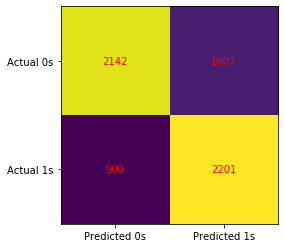

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [131]:
# import modules
from sklearn.cluster import KMeans
from sklearn import datasets 

In [148]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

C:\Users\Simran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [150]:
y_pred = logreg.predict(X_test_cv)
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Observation: Logistic Regression gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: Logistic Regression gives an accuracy of 88.38% on the testing data


In [153]:
text_train, y_train = df.review, df.label

print("Number of documents in train data: {}", text_train)
print("Samples per class (train): {}" ,y_train)

text_test, y_test = df.review, df.label

print("Number of documents in test data: {}", text_test)
print("Samples per class (test): {}" ,(y_test))

Number of documents in train data: {} 0        I rented I AM CURIOUS-YELLOW from my video sto...
1        "I Am Curious: Yellow" is a risible and preten...
2        If only to avoid making this type of film in t...
3        This film was probably inspired by Godard's Ma...
4        Oh, brother...after hearing about this ridicul...
                               ...                        
24995    A hit at the time but now better categorised a...
24996    I love this movie like no other. Another time ...
24997    This film and it's sequel Barry Mckenzie holds...
24998    'The Adventures Of Barry McKenzie' started lif...
24999    The story centers around Barry McKenzie who mu...
Name: review, Length: 25000, dtype: object
Samples per class (train): {} 0        0
1        0
2        0
3        0
4        0
        ..
24995    1
24996    1
24997    1
24998    1
24999    1
Name: label, Length: 25000, dtype: int64
Number of documents in test data: {} 0        I rented I AM CURIOUS-YELLOW fro

In [155]:
# PHASE 2 extra credit
import pandas as pd
unsup_df= pd.DataFrame(df, columns=['review'])
unsup_df.head()

,review
0,I rented I AM CURIOUS-YELLOW from my video sto...
1,"""I Am Curious: Yellow"" is a risible and preten..."
2,If only to avoid making this type of film in t...
3,This film was probably inspired by Godard's Ma...
4,"Oh, brother...after hearing about this ridicul..."


In [157]:
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(unsup_df.review)

# Creating a dataframe for the high frequency words for unlabelled reviews set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

In [158]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(unsup_df.review)
 
# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 movie
 film
 br
 like
 good
 just
 really
 story
 time
 great
Cluster 1:
 br
 movie
 film
 like
 just
 good
 really
 story
 time
 bad


In [160]:
################################## Preparing dataframe for model ##############################

# Creating df_algo dataframe which will be used for hypothesis testing
df_algo = pd.concat([train, test], keys=['train', 'test'])
df_algo = df_algo.reset_index(col_level=1).drop(['level_1'], axis=1)

In [166]:
# Prediction for test set using Kmeans clusters
Y = vectorizer.transform(df.review)
prediction = model.predict(Y)

# Actual results of test sets for comparison
le = LabelEncoder()
y = le.fit_transform(df.label)

# check the accuracy of the model
accuracy = accuracy_score(y, prediction)
if accuracy < 0.5:
    accuracy = 1 - accuracy
print("Observation: The unsupervised learning gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: The unsupervised learning gives an accuracy of 52.30% on the testing data


In [167]:
##################################### Using K-means to create 4 clusters ##################################### 

# Vectorizing dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(unsup_df.review)
 
# Creating a k-means object and fitting it to target variable
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=13)
model.fit(X)
 
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 br
 movie
 film
 just
 like
 good
 bad
 really
 story
 time
Cluster 1:
 film
 movie
 like
 good
 just
 story
 great
 time
 really
 br
Cluster 2:
 br
 film
 movie
 like
 just
 story
 good
 time
 really
 people
Cluster 3:
 movie
 bad
 br
 just
 movies
 like
 good
 really
 don
 watch


In [168]:
from sklearn.model_selection import KFold

In [169]:
#KFold
kf = KFold(n_splits=2)

In [171]:
for train, test in kf.split(X_train_cv):
    print("%s %s" % (train, test))

[ 9375  9376  9377 ... 18747 18748 18749] [   0    1    2 ... 9372 9373 9374]
[   0    1    2 ... 9372 9373 9374] [ 9375  9376  9377 ... 18747 18748 18749]
